<a href="https://colab.research.google.com/github/mohmaed7777/NLP-for-COVID-19-Research-Preprint/blob/main/COVID_19_Research_Preprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DataSet Describtion:**
Everyday hardworking scientists and researchers across the globe are working on the current global COVID-19 pandemic and interesting research is being uploaded to great sites like medRxiv and bioRxiv in the form of preprints **(preprints are preliminary reports that have not been peer-reviewed. They should not be regarded as conclusive, guide clinical practice/health-related behavior, or be reported in news media as established information.)**

**The current version of the data contains the basic mix of preprint Title, Abstract and Author information along with the link to access the preprint.**


In [1]:
import pandas as pd
import numpy as np
import re
import string
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import  CountVectorizer
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print('====================!===============!')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
====================!===============!


In [2]:
data = pd.read_csv('/content/COVID-19-Preprint-Data_ver5.csv')

In [3]:
data.rename({'Uploaded Site':'Source'}, axis=1, inplace=True)

In [4]:
data.head()

,DOI,Date of Upload,Title of preprint,Preprint Link,Abstract,Number of Authors,Authors,Author(s) Institutions,Source
0,10.1101/2020.06.19.20135996,2020-06-20,The support needs of Australian primary health...,http://medrxiv.org/cgi/content/short/2020.06.1...,Aim: To identify Australian primary healthcare...,7,"['Elizabeth Halcomb', 'Anna Williams', 'Christ...","{""University of Wollongong"": 6, ""University of...",medrxiv
1,10.1101/2020.06.18.20135103,2020-06-20,Modeling quantitative traits for COVID-19 case...,http://medrxiv.org/cgi/content/short/2020.06.1...,Medical practitioners record the condition sta...,6,"['Nuria Queralt-Rosinach', 'Susan Bello', 'Rob...","{""Leids Universitair Medisch Centrum"": 1, ""The...",medrxiv
2,10.1101/2020.06.19.20135905,2020-06-20,SARS-CoV-2 RT-PCR profile in 298 Indian COVID-...,http://medrxiv.org/cgi/content/short/2020.06.1...,Background: Despite being in the 5th month of ...,9,"['bisakh bhattacharya', 'Rohit Kumar', 'Dr. Ve...","{""AIIMS, New Delhi"": 8, ""All India Institute o...",medrxiv
3,10.1101/2020.06.19.20135491,2020-06-20,Inhaled corticosteroid use and risk COVID-19 r...,http://medrxiv.org/cgi/content/short/2020.06.1...,Background: Early descriptions of the coronavi...,33,"['- The OpenSAFELY Collaborative', 'Anna Schul...","{"""": 1, ""London School of Hygiene and Tropical...",medrxiv
4,10.1101/2020.06.19.20135533,2020-06-20,The immediate psychological response of the ge...,http://medrxiv.org/cgi/content/short/2020.06.1...,Background: The health and economic burden pan...,4,"['Royes Joseph', 'Dhfer Alshayban', 'Jisha M L...","{""College of Clinical Pharmacy, Imam Abdulrahm...",medrxiv


In [6]:
data.Source.value_counts()

medrxiv    4433
biorxiv    1102
Name: Source, dtype: int64

In [7]:
data.isnull().sum()

DOI                       0
Date of Upload            0
Title of preprint         0
Preprint Link             0
Abstract                  0
Number of Authors         0
Authors                   0
Author(s) Institutions    0
Source                    0
dtype: int64

In [8]:
data.dtypes

DOI                       object
Date of Upload            object
Title of preprint         object
Preprint Link             object
Abstract                  object
Number of Authors          int64
Authors                   object
Author(s) Institutions    object
Source                    object
dtype: object

In [9]:
df_uniques = data.nunique() 
# Count number of distinct elements in specified axis. 
#Return Series with number of distinct elements. Can ignore NaN values.
df_uniques

DOI                       5535
Date of Upload             151
Title of preprint         5532
Preprint Link             5535
Abstract                  5530
Number of Authors           73
Authors                   5414
Author(s) Institutions    5352
Source                       2
dtype: int64

In [10]:
binary_vals = list(df_uniques[df_uniques == 2].index) # Create alist for our bin_vales (composed of at least two values)
binary_vals

['Source']

In [12]:
from sklearn.preprocessing import LabelBinarizer

In [13]:
lb = LabelBinarizer()

In [14]:
for col in binary_vals:
  data[col] = lb.fit_transform(data[col])

In [15]:
data.Source.dtypes

dtype('int64')

In [16]:
data.Source.value_counts()

1    4433
0    1102
Name: Source, dtype: int64

In [17]:
data.columns

Index(['DOI', 'Date of Upload', 'Title of preprint', 'Preprint Link',
       'Abstract', 'Number of Authors', 'Authors', 'Author(s) Institutions',
       'Source'],
      dtype='object')

In [18]:
data.drop(['DOI', 'Date of Upload', 'Title of preprint', 'Preprint Link', 'Number of Authors', 'Authors', 'Author(s) Institutions'], axis=1, inplace=True)

In [19]:
data.head()

,Abstract,Source
0,Aim: To identify Australian primary healthcare...,1
1,Medical practitioners record the condition sta...,1
2,Background: Despite being in the 5th month of ...,1
3,Background: Early descriptions of the coronavi...,1
4,Background: The health and economic burden pan...,1


In [20]:
data.isnull().sum()

Abstract    0
Source      0
dtype: int64

Text(0, 0.5, 'Count')

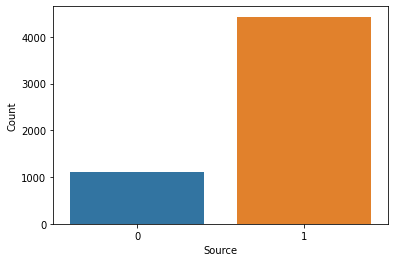

In [21]:
counts = data['Source'].value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Source')
plt.ylabel('Count')

#**Text preprocessing:**

In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [23]:
len(data['Abstract'])

5535

In [24]:
data.shape

(5535, 2)

In [33]:
data['Abstract'].nunique()

5530

In [40]:
data['Abstract'][0]

"Aim: To identify Australian primary healthcare nurses immediate support needs during the COVID-19 pandemic. Background: COVID-19 has had widespread implications for primary healthcare nurses. Supporting these nurses' capacity to deliver quality care ensures that ongoing health needs can be met. Methods: Primary healthcare nurses were recruited to an online survey via social media and professional organisations in April 2020. Results: Six-hundred and thirty-seven responses were included in analysis. Participants provided 1213 statements about perceived supports required to provide quality clinical care. From these, seven key categories emerged, namely; personal protective equipment, communication, funding, industrial issues, self-care, workplace factors and valuing nurses. Conclusion: A number of key issues relating to personal health and safety, care quality, and job security need to be addressed to support primary healthcare nurses during the COVID-19 pandemic. Addressing these suppo

In [38]:
print(len(data['Abstract'][0]))

1450


In [41]:
print(len(data['Abstract'][1]))

1155


In [42]:
data['Abstract'][1]

'Medical practitioners record the condition status of a patient through qualitative and quantitative observations. The measurement of vital signs and molecular parameters in the clinics gives a complementary description of abnormal phenotypes associated with the progression of a disease. The Clinical Measurement Ontology (CMO) is used to standardize annotations of these measurable traits. However, researchers have no way to describe how these quantitative traits relate to phenotype concepts in a machine-readable manner. Using the WHO clinical case report form standard for the COVID-19 pandemic, we modeled quantitative traits and developed OWL axioms to formally relate clinical measurement terms with anatomical, biomolecular entities and phenotypes annotated with the Uber-anatomy ontology (Uberon), Chemical Entities of Biological Interest (ChEBI) and the Phenotype and Trait Ontology (PATO) biomedical ontologies. The formal description of these relations allows interoperability between c

In [63]:
vocab_size = 1800
embedding_dim = 20
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 5530

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['Abstract'],data['Source'],test_size = 0.3)

In [65]:
#X_train, X_test, y_train, y_test = X_train.tolist(), X_test.tolist() , y_train.tolist() , y_test.tolist()
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [66]:
training_padded = np.array(training_padded)
training_labels = np.array(y_train)
testing_padded = np.array(testing_padded)
testing_labels = np.array(y_test)

In [67]:

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [68]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [69]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          115200    
_________________________________________________________________
bidirectional_4 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_5 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 226,689
Trainable params: 226,689
Non-trainable params: 0
_________________________________________________________________


In [71]:
num_epochs = 20
model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/20
122/122 - 22s - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.6269 - val_accuracy: 0.9247
Epoch 2/20
122/122 - 22s - loss: 9.1212e-04 - accuracy: 0.9997 - val_loss: 0.6431 - val_accuracy: 0.9247
Epoch 3/20
122/122 - 22s - loss: 8.5721e-04 - accuracy: 0.9997 - val_loss: 0.6509 - val_accuracy: 0.9253
Epoch 4/20
122/122 - 22s - loss: 6.7257e-04 - accuracy: 0.9997 - val_loss: 0.6816 - val_accuracy: 0.9253
Epoch 5/20
122/122 - 22s - loss: 8.4884e-04 - accuracy: 0.9997 - val_loss: 0.6568 - val_accuracy: 0.9259
Epoch 6/20
122/122 - 22s - loss: 3.2022e-04 - accuracy: 1.0000 - val_loss: 0.7115 - val_accuracy: 0.9229
Epoch 7/20
122/122 - 23s - loss: 8.7523e-05 - accuracy: 1.0000 - val_loss: 0.7152 - val_accuracy: 0.9253
Epoch 8/20
122/122 - 22s - loss: 5.2063e-05 - accuracy: 1.0000 - val_loss: 0.7235 - val_accuracy: 0.9266
Epoch 9/20
122/122 - 22s - loss: 4.0211e-05 - accuracy: 1.0000 - val_loss: 0.7330 - val_accuracy: 0.9259
Epoch 10/20
122/122 - 22s - loss: 3.2116e-05 - accuracy: 1.

In [72]:
results = model.evaluate(testing_padded, y_test, verbose=0)
print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.81753
Test Accuracy: 92.47%


In [73]:
testing_padded.shape

(1661, 100)

In [74]:
y_pred = model.predict(testing_padded)
print(y_pred[:4])

[[5.8780703e-08]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]]
